In [1]:
#https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
from tensorflow.keras.utils import to_categorical

In [3]:
label = ['feat_{}'.format(i) for i in range(74)]
df = pd.read_csv('eighthr.data', names = label)
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [4]:
df.describe()

,feat_73
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 74 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   2534 non-null   object 
 1   feat_1   2534 non-null   object 
 2   feat_2   2534 non-null   object 
 3   feat_3   2534 non-null   object 
 4   feat_4   2534 non-null   object 
 5   feat_5   2534 non-null   object 
 6   feat_6   2534 non-null   object 
 7   feat_7   2534 non-null   object 
 8   feat_8   2534 non-null   object 
 9   feat_9   2534 non-null   object 
 10  feat_10  2534 non-null   object 
 11  feat_11  2534 non-null   object 
 12  feat_12  2534 non-null   object 
 13  feat_13  2534 non-null   object 
 14  feat_14  2534 non-null   object 
 15  feat_15  2534 non-null   object 
 16  feat_16  2534 non-null   object 
 17  feat_17  2534 non-null   object 
 18  feat_18  2534 non-null   object 
 19  feat_19  2534 non-null   object 
 20  feat_20  2534 non-null   object 
 21  feat_21  2534 

In [6]:
# data type을 숫자로 바꿈 / 날짜를 지움
df = df.apply(pd.to_numeric, errors = 'coerce')
df = df.drop(['feat_0'], axis = 1)
df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00,0.0
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00,0.0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00,0.0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05,0.0


In [7]:
# 결측치 제거
df.dropna(inplace = True)

In [8]:
df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0.0
6,3.7,3.2,3.8,5.1,6.0,7.0,6.3,6.4,6.3,5.4,...,0.84,6.86,25.60,5695.0,26.75,48.45,10040.0,-80.0,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00,0.0
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00,0.0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00,0.0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05,0.0


In [9]:
# 마지막 데이터 - 정답 데이터
Y = df['feat_73']
Y

0       0.0
1       0.0
2       0.0
3       0.0
6       0.0
       ... 
2529    0.0
2530    0.0
2531    0.0
2532    0.0
2533    0.0
Name: feat_73, Length: 1847, dtype: float64

In [10]:
# 정답 데이터 2개(이중분류)
Y.value_counts()

0.0    1719
1.0     128
Name: feat_73, dtype: int64

In [11]:
# categorical - 인코딩
Y = to_categorical(Y)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
df.drop(['feat_73'], axis = 1, inplace = True)

In [13]:
df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,-15.5,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,-14.5,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,-15.9,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,-16.8,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08
6,3.7,3.2,3.8,5.1,6.0,7.0,6.3,6.4,6.3,5.4,...,-11.8,0.84,6.86,25.60,5695.0,26.75,48.45,10040.0,-80.0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,-12.4,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,-12.0,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,-11.8,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,-10.8,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05


In [14]:
X_train = np.asarray(df[:-100].values.tolist(), dtype = np.float64)
X_test = np.asarray(df[-100:].values.tolist(), dtype = np.float64)

Y_train = Y[:-100]
Y_test = Y[-100:]

print(f'X_train.shape:{X_train.shape}, Y_train.shape:{Y_train.shape}, X_test.shape:{X_test.shape}, Y_test.shape:{Y_test.shape}')

X_train.shape:(1747, 72), Y_train.shape:(1747, 2), X_test.shape:(100, 72), Y_test.shape:(100, 2)


In [15]:
# (sample, timestep, features) = N x T x D(features 개수, 차원 개수)
# X_train, Y_train -> (N x T x D) 차원 변경

In [16]:
# 계산하기 쉽게 1700번째까지 자름.
X_train = X_train[:1700]
Y_train = Y_train[:1700]

In [17]:
# 차원 확장
X_train = X_train.reshape(-1, 10, 72)
Y_train = Y_train.reshape(-1, 10, 2)

In [18]:
# 1700 / 10 = 170 인 듯 (1700개 행을 10개의 열로 만들어야 하니까 1700 / 10 = 170개의 행이 됨.)
print(f'X_train.shape:{X_train.shape}, Y_train.shape:{Y_train.shape}')

X_train.shape:(170, 10, 72), Y_train.shape:(170, 10, 2)


### Build a model

In [27]:
# 정확도 얼마인지?(accuracy)
# LSTM + GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam

i = Input(shape = (10, 72)) # T x D
x = LSTM(128, return_sequences = True)(i) # many to many
x = Dense(2, activation = 'softmax')(x)
model = Model(i, x)
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10, 72)]          0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 128)           102912    
                                                                 
 dense_4 (Dense)             (None, 10, 2)             258       
                                                                 
Total params: 103,170
Trainable params: 103,170
Non-trainable params: 0
_________________________________________________________________


In [28]:
r = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.3)

Epoch 1/30
4/4 [==============================] - 2s 218ms/step - loss: 0.4165 - accuracy: 0.9127 - val_loss: 0.3360 - val_accuracy: 0.9615
Epoch 2/30
4/4 [==============================] - 0s 15ms/step - loss: 0.3777 - accuracy: 0.9127 - val_loss: 0.2956 - val_accuracy: 0.9615
Epoch 3/30
4/4 [==============================] - 0s 12ms/step - loss: 0.3502 - accuracy: 0.9127 - val_loss: 0.2637 - val_accuracy: 0.9615
Epoch 4/30
4/4 [==============================] - 0s 13ms/step - loss: 0.3313 - accuracy: 0.9127 - val_loss: 0.2392 - val_accuracy: 0.9615
Epoch 5/30
4/4 [==============================] - 0s 16ms/step - loss: 0.3162 - accuracy: 0.9127 - val_loss: 0.2217 - val_accuracy: 0.9615
Epoch 6/30
4/4 [==============================] - 0s 15ms/step - loss: 0.3085 - accuracy: 0.9127 - val_loss: 0.2085 - val_accuracy: 0.9615
Epoch 7/30
4/4 [==============================] - 0s 14ms/step - loss: 0.3028 - accuracy: 0.9127 - val_loss: 0.1992 - val_accuracy: 0.9615
Epoch 8/30
4/4 [==========

In [29]:
# 차원 확장
X_test = X_test.reshape(-1, 10, 72)
Y_test = Y_test.reshape(-1, 10, 2)

In [30]:
# 정확도 98%
result = model.evaluate(X_test, Y_test)
result

1/1 [==============================] - 0s 19ms/step - loss: 0.1407 - accuracy: 0.9800


[0.1407260000705719, 0.9800000190734863]

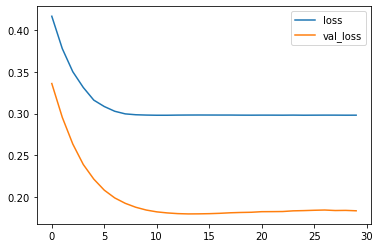

In [31]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

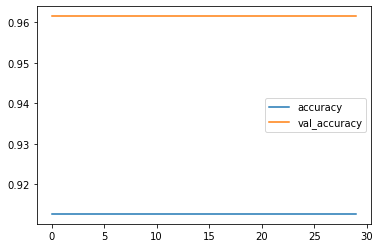

In [32]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()